In [1]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np

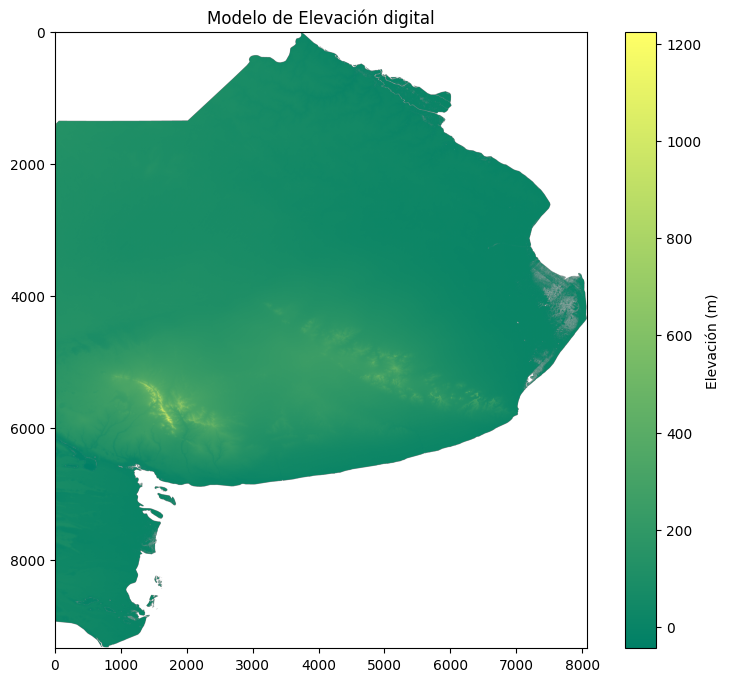

In [2]:
# Exploring data from 'bsas.tif'

with rasterio.open('bsas.tif') as src:
    data = src.read(1, masked=True)

plt.figure(figsize=(10,8))
plt.imshow(data, cmap= 'summer')
plt.colorbar(label='Elevación (m)')
plt.title("Modelo de Elevación digital")
plt.show()

In [3]:
# Show basic data
print(f"Dimensiones: {data.shape}")
print(f"Resolución (X, Y): {src.res}")
print(f"Sistema de referencia: {src.crs}")

Dimensiones: (9345, 8068)
Resolución (X, Y): (0.0008333333332920178, 0.0008333333333333335)
Sistema de referencia: EPSG:4326


In [4]:
# Show metadata
print("Valor de nodata:", src.nodata)
print("Transformación:", src.transform)

Valor de nodata: 0.0
Transformación: | 0.00, 0.00,-63.39|
| 0.00,-0.00,-33.26|
| 0.00, 0.00, 1.00|


In [6]:
#Veamos lo datos de elevación Banda 1
with rasterio.open('bsas.tif') as src:
    profile = src.profile.copy()
    data_1 = src.read(1)

    # Se crea una máscara binaria (1 : elevación = 3m)
    mask = np.where((data_1 <= 3) & (data_1 != src.nodata), 1, 0)

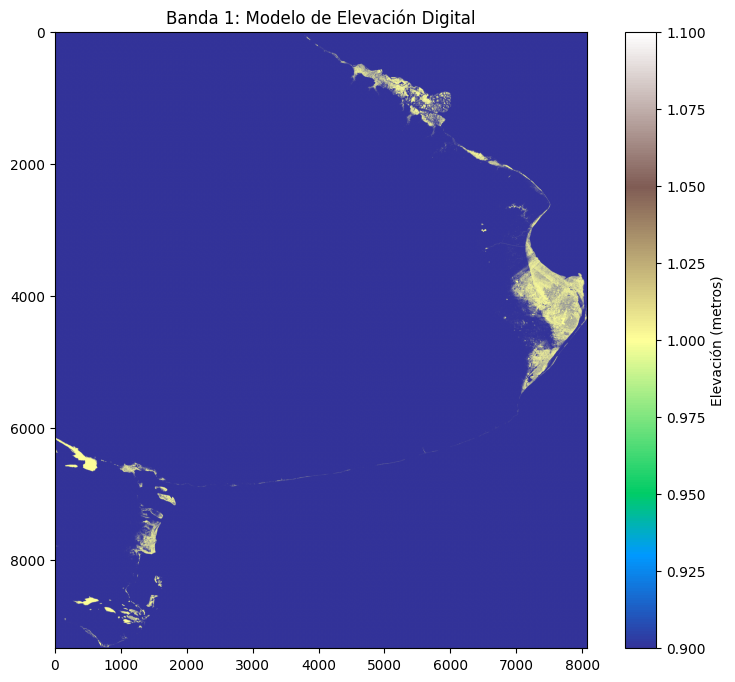

In [7]:
# Plotting mask

profile.update(dtype='uint8', nodata=0)
with rasterio.open('mask.tif', 'w', **profile) as dst:
    dst.write(mask, 1)
    
plt.figure(figsize=(10, 8))
plt.imshow(mask, cmap='terrain', vmin=1)  # Ignorar 0 (NoData)
plt.colorbar(label='Elevación (metros)')
plt.title('Banda 1: Modelo de Elevación Digital')
plt.show()